In [1]:
import pandas as pd

In [14]:
%matplotlib inline

In [2]:
percent_imputation_results = pd.read_csv("../results/percent_imputation_results.csv")
percent_imputation_results.drop("Unnamed: 0", axis=1, inplace=True)
percent_imputation_results.head()
percent_imputation_results['imputer'].replace("SoftMax", "Soft Impute",inplace=True)
percent_imputation_results.imputer.value_counts()

Soft Impute    112
MICE           112
KNN            112
Median         112
Mean           112
Name: imputer, dtype: int64

In [3]:
# Plotting

import plotly.plotly as py
import plotly.graph_objs as go

def plot_errors(feature):
    current = feature
    N = 10
    x_axis = np.linspace(10, 100, 10)
#     svd_y = svd_impute_test.loc[current].values
    knn_y = percent_imputation_results[(percent_imputation_results["imputer"] == "KNN") & (percent_imputation_results["feature"] == current)]["mae"]
    mice_y = percent_imputation_results[(percent_imputation_results["imputer"] == "MICE") & (percent_imputation_results["feature"] == current)]["mae"]
    soft_y = percent_imputation_results[(percent_imputation_results["imputer"] == "Soft Impute") & (percent_imputation_results["feature"] == current)]["mae"]
    mean_y = percent_imputation_results[(percent_imputation_results["imputer"] == "Mean") & (percent_imputation_results["feature"] == current)]["mae"]
    median_y = percent_imputation_results[(percent_imputation_results["imputer"] == "Median") & (percent_imputation_results["feature"] == current)]["mae"]

    # Create traces
    trace0 = go.Scatter(
        x =  x_axis,
        y = knn_y,
        mode = 'lines+markers',
        name = 'KNN Imputer'
    )
    trace1 = go.Scatter(
        x =  x_axis,
        y = median_y,
        mode = 'lines+markers',
        name = 'Median Imputer'
    )

    trace2 = go.Scatter(
        x = x_axis,
        y = mean_y,
        mode = 'lines+markers',
        name = 'Mean Imputer'
    )
    trace3 = go.Scatter(
        x = x_axis,
        y = mice_y,
        mode = 'lines+markers',
        name = 'MICE Imputer'
    )
    trace4 = go.Scatter(
        x = x_axis,
        y = soft_y,
        mode = 'lines+markers',
        name = 'Softmax Imputer'
    )
    


    data = [trace0, trace1, trace2, trace3, trace4]


    layout = dict(title = current,
                  xaxis = dict(title = 'Percent of data imputed'),
                 yaxis = dict(title = 'Mean Absolute Error'),
                  )

    fig = dict(data=data, layout=layout)

    return py.iplot(fig, filename='line-mode')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [4]:
plot_errors("total_lbs_proppant")

NameError: name 'plot_errors' is not defined

In [ ]:
## Some top features:
### 'surface_lat', 'bh_lat', 'total_lbs_proppant', 'total_volume_bbls', 'mean_tvd', 'max_tvd'

plot_errors("surface_lat")

plot_errors("total_volume_bbls")

plot_errors("mean_tvd")

plot_errors("legs")

In [29]:
bakken_big_test_90_100_df = pd.read_csv("../results/bakken_big_test_90_100_all.csv")

bakken_big_test_90_100_df.drop("Unnamed: 0", axis=1, inplace=True)

In [30]:
bakken_big_test_90_200_df.imputer_type.value_counts()

mice_imputer    140
soft_imputer    140
sf_median       140
knn_imputer     140
sf_mean         140
Name: imputer_type, dtype: int64

In [31]:
bakken_big_test_90_100_df.head()

,num_rows,imputer_type,mae
0,0,soft_imputer,10129.674282
1,0,knn_imputer,10250.535838
2,0,mice_imputer,10116.593341
3,0,soft_imputer,10147.885859
4,0,sf_median,10228.034744


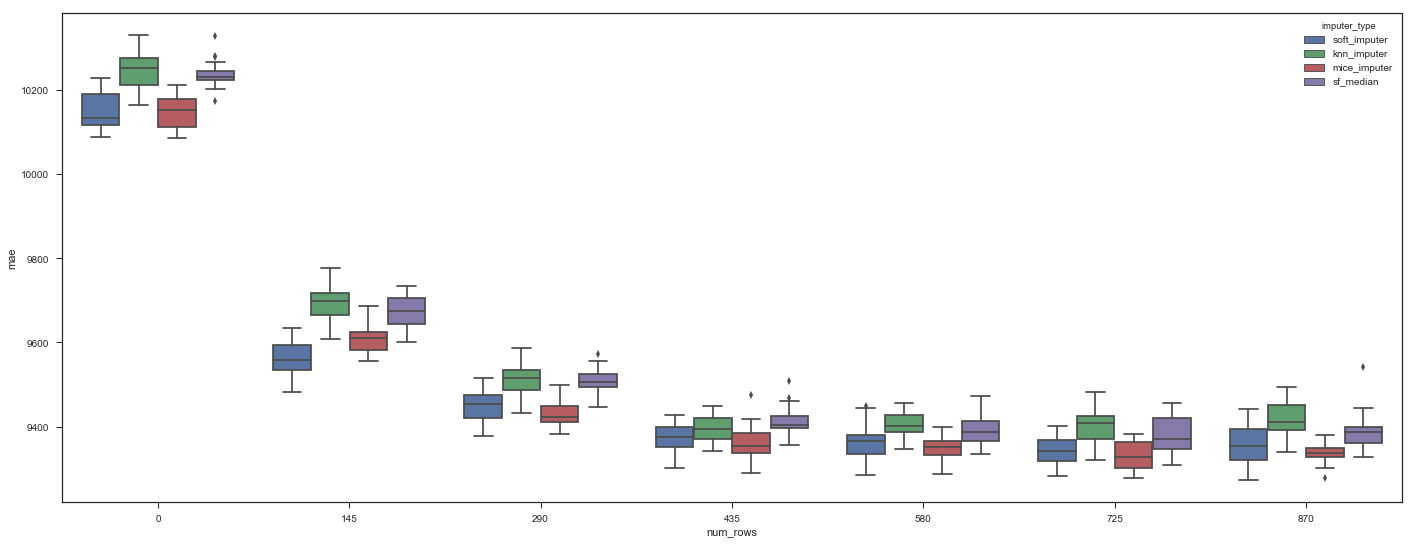

In [32]:
sns.set(style="ticks")

results_df = bakken_big_test_90_200_df

filtered_df = results_df[((results_df['imputer_type'] == "sf_median") | (results_df['imputer_type'] == "knn_imputer") | \
                          (results_df['imputer_type'] == "mice_imputer") | (results_df['imputer_type'] == "soft_imputer"))
                            ]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 9)

sns.boxplot(x="num_rows", y="mae", hue="imputer_type", data=filtered_df, palette="deep")

In [53]:
newfield_big_test_90_df = pd.read_csv("../results/big_test_results_90.csv")

newfield_big_test_90_df.drop("Unnamed: 0", axis=1, inplace=True)
newfield_big_test_90_df.head()

,num_rows,imputer_type,mae
0,0,soft_imputer,13559.670600
1,0,sf_median,13184.314000
2,0,soft_imputer,14215.903736
3,0,mice_imputer,15698.042833
4,0,knn_imputer,13965.260833


In [57]:
newfield_big_test_90_200_df = pd.read_csv("../results/big_test_90_200.csv")

newfield_big_test_90_200_df.drop("Unnamed: 0", axis=1, inplace=True)

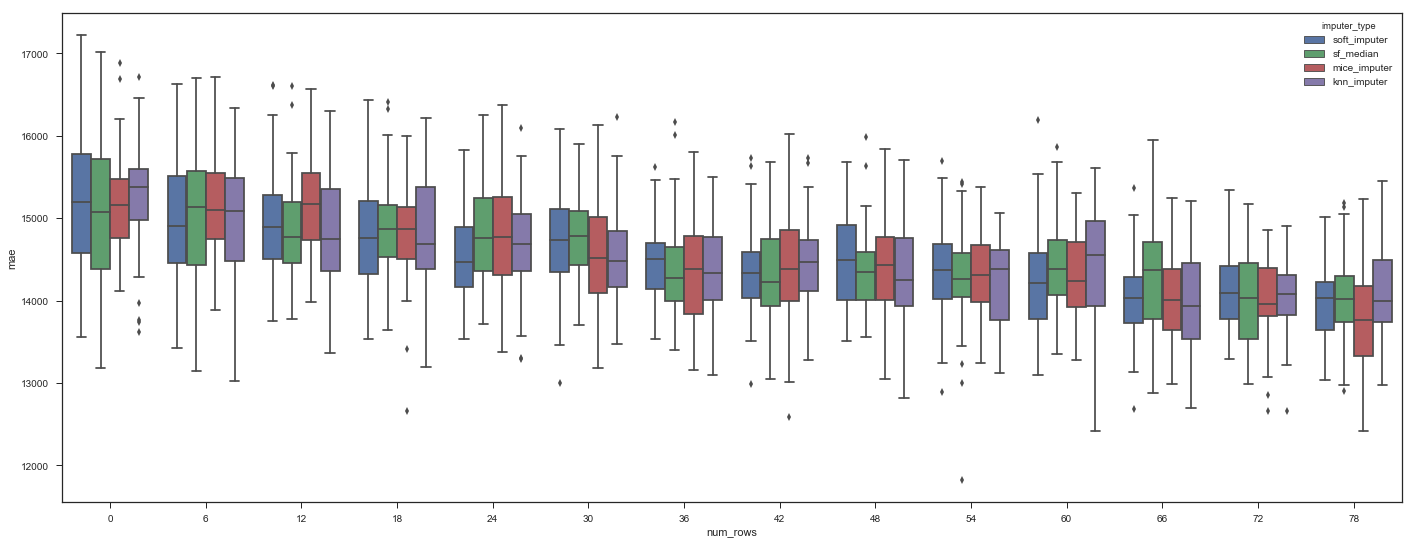

In [58]:
sns.set(style="ticks")

results_df = newfield_big_test_90_df

filtered_df = results_df[((results_df['imputer_type'] == "sf_median") | (results_df['imputer_type'] == "knn_imputer") | \
                          (results_df['imputer_type'] == "mice_imputer") | (results_df['imputer_type'] == "soft_imputer"))
                            ]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 9)

sns.boxplot(x="num_rows", y="mae", hue="imputer_type", data=filtered_df, palette="deep")

In [39]:
newfield_big_test_90_200_df.head()

,num_rows,imputer_type,mae
0,0,soft_imputer,14907.594005
1,0,mice_imputer,14920.297315
2,0,knn_imputer,14871.356418
3,0,sf_mean,14678.609609
4,0,sf_median,14238.107398


In [40]:
newfield_big_test_90_200_df.imputer_type.value_counts()

mice_imputer    210
soft_imputer    210
sf_median       210
knn_imputer     210
sf_mean         210
Name: imputer_type, dtype: int64

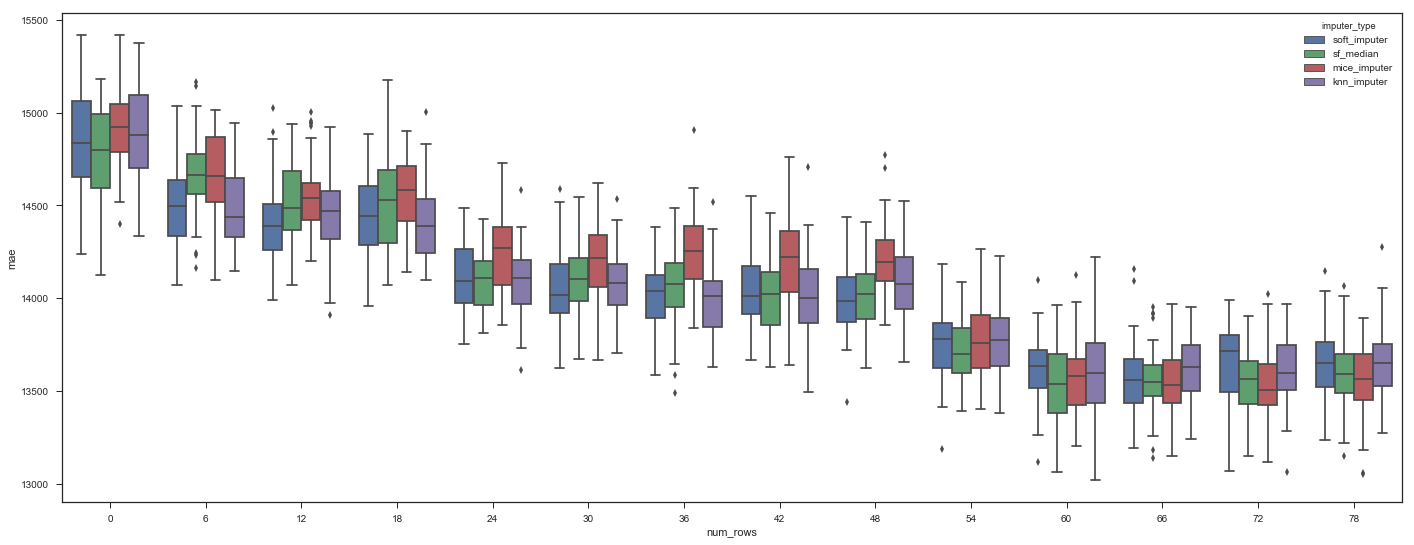

In [59]:
sns.set(style="ticks")

results_df = newfield_big_test_90_200_df

filtered_df = results_df[((results_df['imputer_type'] == "sf_median") | (results_df['imputer_type'] == "knn_imputer") | \
                          (results_df['imputer_type'] == "mice_imputer") | (results_df['imputer_type'] == "soft_imputer"))
                            ]

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 9)

sns.boxplot(x="num_rows", y="mae", hue="imputer_type", data=filtered_df, palette="deep")

In [42]:
newfield_big_test_180_200_df = pd.read_csv("../results/big_test_180_200.csv")
newfield_big_test_180_200_df.drop("Unnamed: 0", axis=1, inplace=True)
newfield_big_test_180_200_df.head()

,num_rows,imputer_type,mae
0,0,soft_imputer,24789.013097
1,0,sf_median,24373.280343
2,0,soft_imputer,24494.361576
3,0,mice_imputer,24314.835510
4,0,knn_imputer,24520.249819


In [44]:
newfield_big_test_180_200_df.imputer_type.value_counts()

sf_mean         700
soft_imputer    700
sf_median       700
mice_imputer    700
knn_imputer     700
Name: imputer_type, dtype: int64

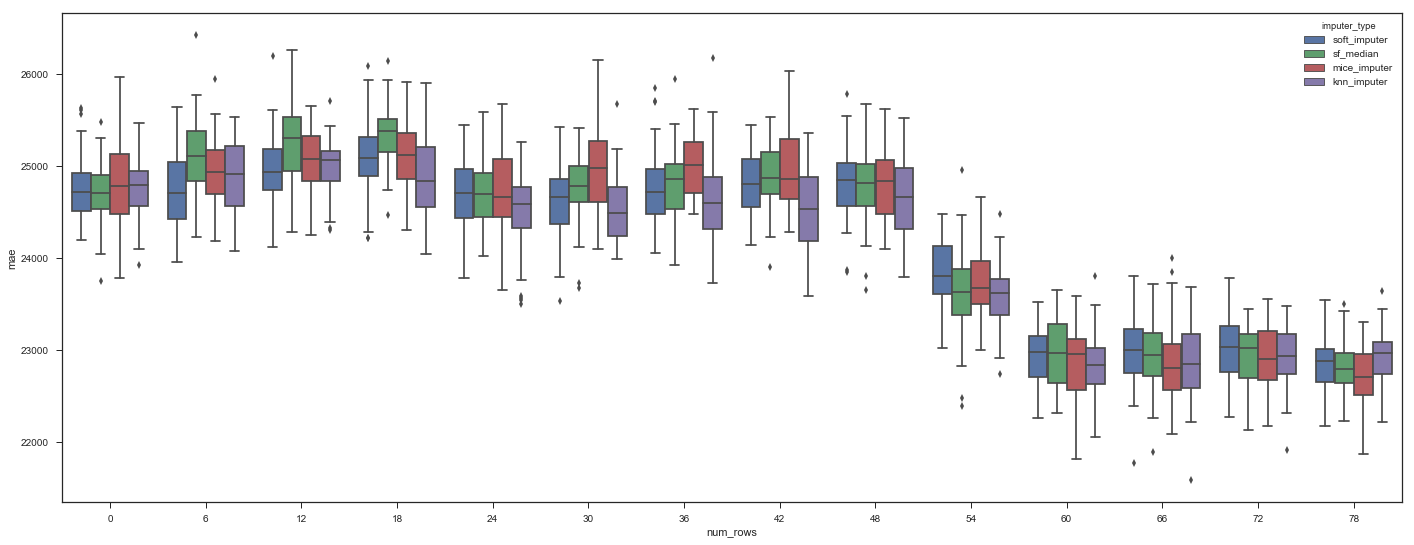

In [46]:
sns.set(style="ticks")
results_df = newfield_big_test_180_200_df
filtered_df = results_df[((results_df['imputer_type'] == "sf_median") | (results_df['imputer_type'] == "knn_imputer") | \
                          (results_df['imputer_type'] == "mice_imputer") | (results_df['imputer_type'] == "soft_imputer"))
                            ]
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 9)
sns.boxplot(x="num_rows", y="mae", hue="imputer_type", data=filtered_df, palette="deep")

In [47]:
newfield_big_test_365_200_df = pd.read_csv("../results/big_test_365_200.csv")
newfield_big_test_365_200_df.drop("Unnamed: 0", axis=1, inplace=True)
newfield_big_test_365_200_df.head()

,num_rows,imputer_type,mae
0,0,soft_imputer,33758.220415
1,0,sf_median,33369.227003
2,0,soft_imputer,34562.360847
3,0,mice_imputer,33729.901325
4,0,knn_imputer,34449.989303


In [49]:
newfield_big_test_365_200_df.imputer_type.value_counts()

sf_mean         700
soft_imputer    700
sf_median       700
mice_imputer    700
knn_imputer     700
Name: imputer_type, dtype: int64

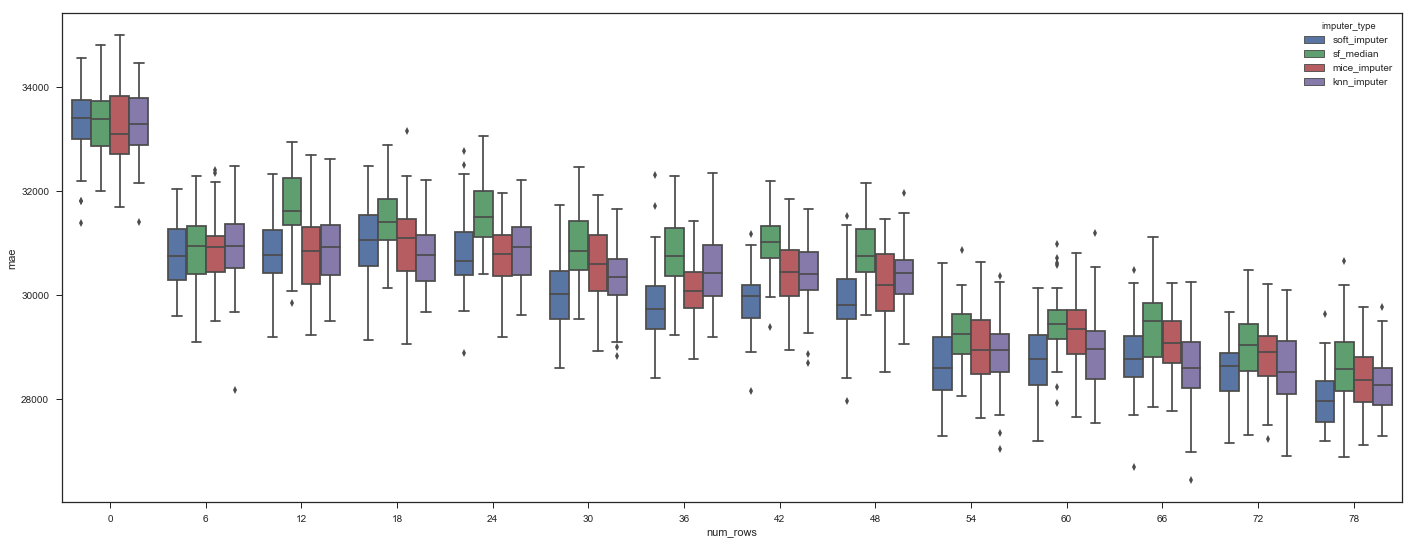

In [51]:
sns.set(style="ticks")
results_df = newfield_big_test_365_200_df
filtered_df = results_df[((results_df['imputer_type'] == "sf_median") | (results_df['imputer_type'] == "knn_imputer") | \
                          (results_df['imputer_type'] == "mice_imputer") | (results_df['imputer_type'] == "soft_imputer"))]
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(24, 9)
sns.boxplot(x="num_rows", y="mae", hue="imputer_type", data=filtered_df, palette="deep")